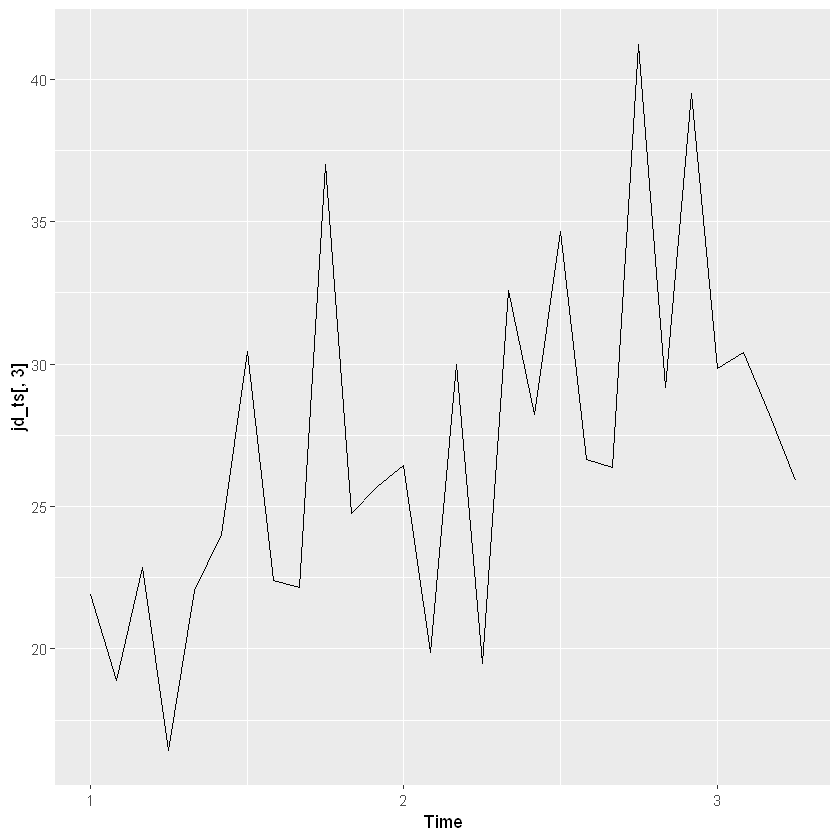

In [1]:
library(forecast)
jd = read.csv('jcdata.csv', head = T)   #load the dataset
jd1 = read.csv('jcdata_new.csv', head=T)  #load the out-of-sample data (for prediction period)

jd_ts = ts(jd, frequency = 12)  #convert dataset to time series
autoplot(jd_ts[,3])

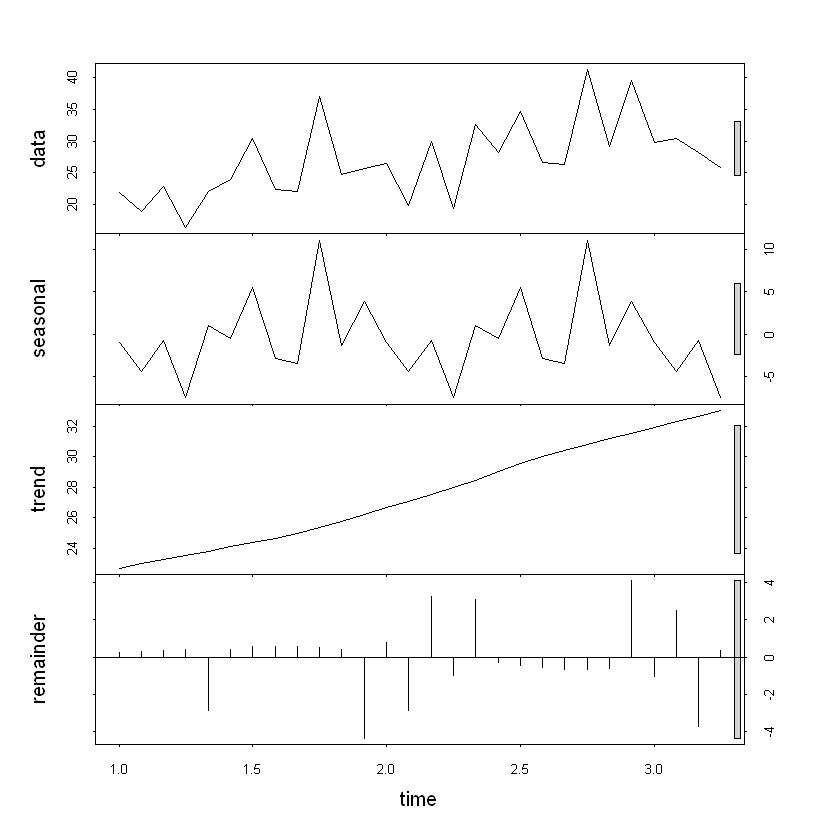

In [2]:
sfit = stl(jd_ts[,3], s.window="period")
plot(sfit)

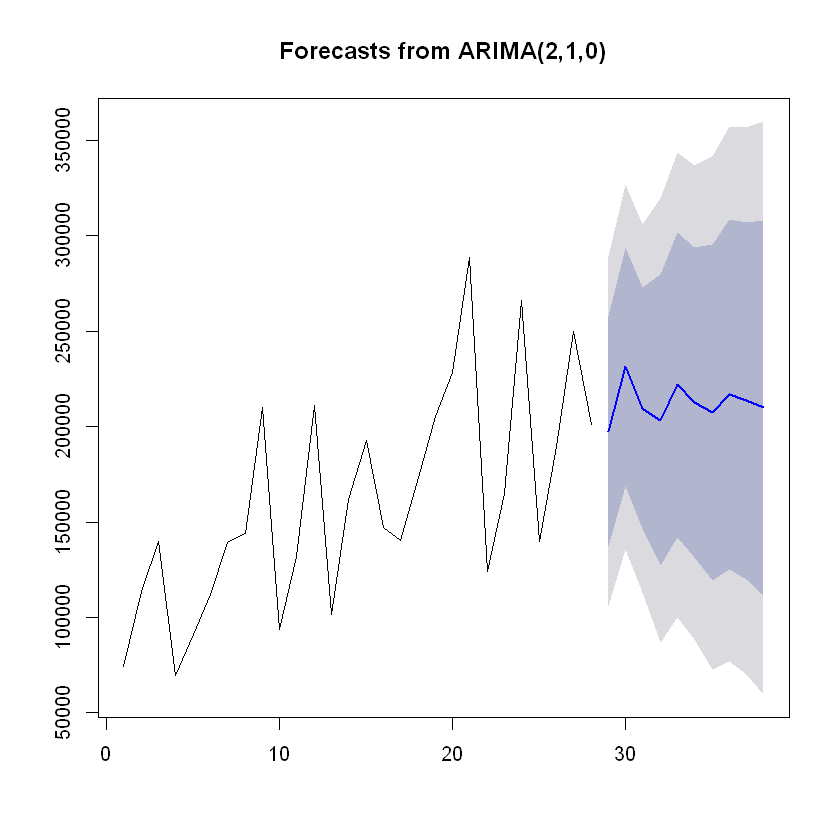

In [3]:
fit = auto.arima(jd$Sales)
jd_pred = forecast(fit, n = 12)
plot(jd_pred)

In [4]:
exo = cbind(jd$Intent, jd$Spend)   # create the data

In [5]:
fitx = auto.arima(jd$Sales, xreg = exo)

In [6]:
summary(fitx)

Series: jd$Sales 
Regression with ARIMA(2,1,0) errors 

Coefficients:
          ar1      ar2      xreg1   xreg2
      -0.8381  -0.5808  -543.5094  0.0448
s.e.   0.1513   0.1553  1257.7777  0.0141

sigma^2 estimated as 1.708e+09:  log likelihood=-323.72
AIC=657.44   AICc=660.29   BIC=663.91

Training set error measures:
                   ME    RMSE     MAE      MPE     MAPE      MASE       ACF1
Training set 11179.93 37461.6 27645.4 3.648135 18.93854 0.4970425 -0.1323299



	Ljung-Box test

data:  Residuals from Regression with ARIMA(2,1,0) errors
Q* = 4.8609, df = 3, p-value = 0.1823

Model df: 4.   Total lags used: 7



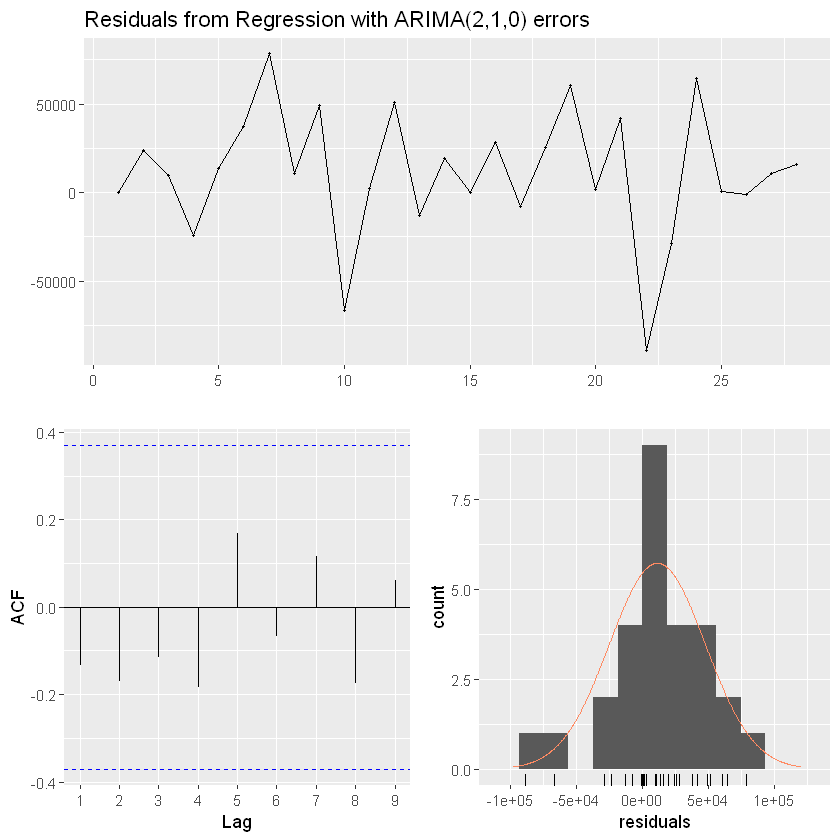

In [7]:
checkresiduals(fitx)

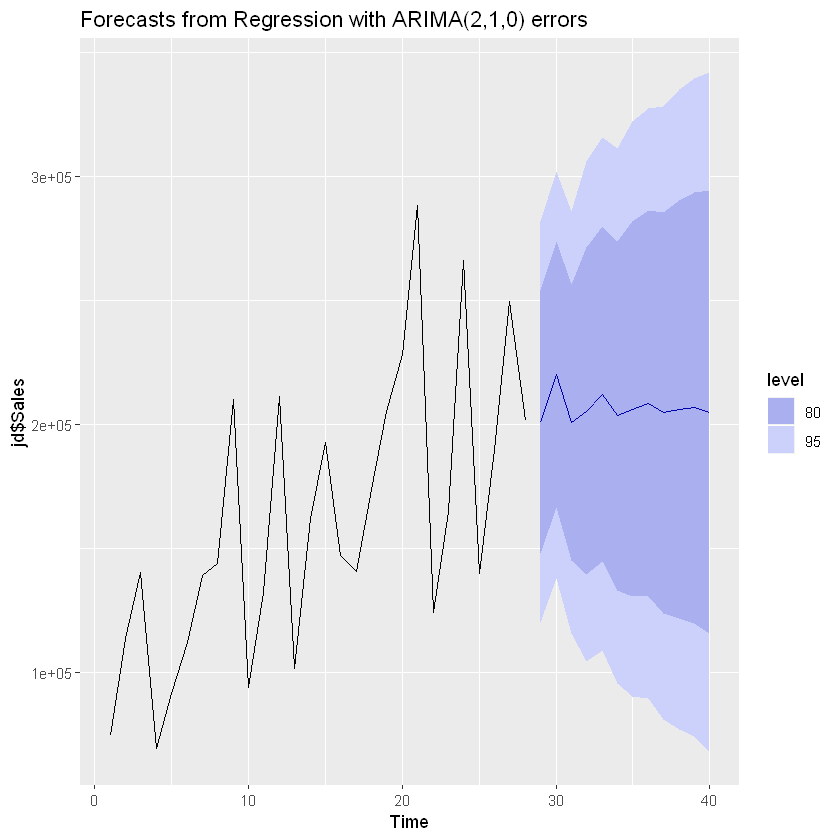

In [8]:
fcast = forecast(fitx, xreg=jd1)
autoplot(fcast)